In [88]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import requests
import io
import random
import copy
from typing import Type

In [89]:
img_bytes = requests.get(
    "https://i.pinimg.com/564x/dc/e5/51/dce5519c29e854e877d14061b3c823f3.jpg", timeout=8
).content
img = PILImage.open(io.BytesIO(img_bytes))
img = img.resize((900, 900))

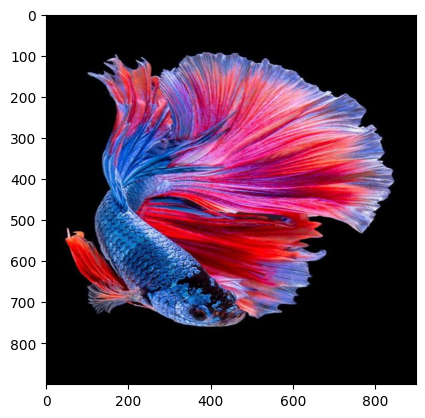

In [90]:
plt.imshow(img)

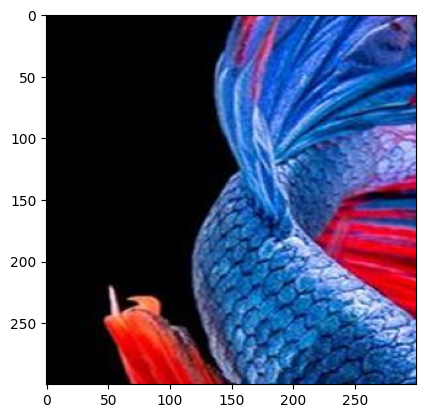

In [91]:
tiles = []

for i in range(0, 3):
    row = []
    for j in range(0, 4):
        box = (j * 300, i * 300, (j + 1) * 300, (i + 1) * 300)
        row.append(img.crop(box))
    tiles.append(row)

plt.imshow(tiles[1][0])

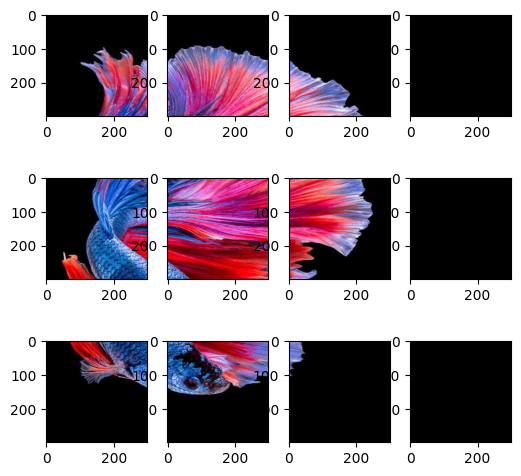

In [92]:
fig = plt.figure(figsize=(6, 6))
i = 1
for row in tiles:
    for tile in row:
        _ = fig.add_subplot(len(tiles), len(tiles[0]), i)
        _ = plt.imshow(tile)
        i += 1

In [93]:
class Problem:
    def __init__(self):
        self.goal = None

    # Lấy trạng thái hiện tại
    def get_state(self):
        pass

    # Lấy các hành động có thể thực hiện
    def get_pos_actions(self):
        pass

    # Hàm chuyển tiếp(transition: Thực hiện hành động
    def action(self, actions):
        pass

    # Hàm trả về chi phí hành động
    def cost(self, action):
        pass

In [108]:
class Eight_puzzle(Problem):
    def __init__(self, img, empty_pos):
        Problem.__init__(self)
        self.w = 3
        self.h = 4
        self.tiles = []

        img_w, img_h = img.size
        self.tile_w = img_w / self.w
        self.tile_h = img_h / self.h

        # Tạo các ô hình với 2 thuộc tính là img (hình) và true_pos chứa vị trí đúng của ô đó.
        for i in range(0, self.w):
            row = []
            for j in range(0, self.h):
                # Trường hợp ô tại(i, j) là rỗng.
                if (i, j) == empty_pos:
                    row.append({"img": None, "true_pos": (i, j)})
                else:
                    # Với ô hình, thực hiện cắt ảnh và thêm vào hàng.
                    box = (
                        j * self.tile_w,
                        i * self.tile_h,
                        (j + 1) * self.tile_w,
                        (i + 1) * self.tile_h,
                    )
                    row.append({"img": img.crop(box), "true_pos": (i, j)})
            self.tiles.append(row)

        self.goal = self.get_state()

    def get_state(self):
        Problem.get_state(self)
        # rows là ma trận chứa các ô.
        rows = []
        cur_row = []
        # Quét từng ô hình để bỏ vào rows.
        for row in self.tiles:
            cur_row = []
            for tile in row:
                # Trạng thái có dạng(i, j, is_empty). Nếu tile['img'] là None, is_empty == True
                cur_row.append((*tile["true_pos"], tile["img"] is None))
            rows.append(tuple(cur_row))
        return tuple(rows)

    def get_pos_actions(self):
        # Hàm lấy hành động khả thi. Không nhất thiết hành động khả thi có đủ lên, xuống, trái, phải. Ví dụ: Nếu ô trống ở góc dưới bên phải, nó không thể thực hiện "phải" hoặc "xuống".
        Problem.get_pos_actions(self)
        actions = []
        pos = self.get_empty_tile_pos()

        x, y = pos

        if x < self.w - 1:
            actions.append("right")
        if x > 0:
            actions.append("left")
        if y < self.h - 1:
            actions.append("down")
        if y > 0:
            actions.append("up")

        return actions

    def action(self, actions):
        Problem.action(self, actions)
        for action in actions:
            if action not in self.get_pos_actions():
                continue

            # Lấy vị trí ô trống.
            x, y = self.get_empty_tile_pos()
            # x2, y2 là tọa độ mới của ô trống.
            x2, y2 = x, y
            match action:
                case "left":
                    x2 = x - 1
                case "right":
                    x2 = x + 1
                case "up":
                    y2 = y - 1
                case "down":
                    y2 = y + 1

            # Hoán đổi ô trống (x, y) sang ô (x2, y2)
            self.__swap((x, y), (x2, y2))

    def cost(self, action):
        Problem.cost(self, action)
        return 1

    def get_empty_tile_pos(self):
        # Tìm vị trí ô trống, trả về vị trí đó.
        for i, row in enumerate(self.get_state()):
            for j, tile_state in enumerate(row):
                if tile_state[2]:
                    return j, i

    def __swap(self, pos1, pos2):
        x1, y1 = pos1
        x2, y2 = pos2
        t = self.tiles[y1][x1]
        self.tiles[y1][x1] = self.tiles[y2][x2]
        self.tiles[y2][x2] = t

    def shuffle(self, n):
        for x in range(0, n):
            action = random.choice(self.get_pos_actions())
            self.action([action])

    def show(self):
        output = ""
        for row in self.get_state():
            output += str(row) + "\n"
        return output

    def show_imgs(self, figsize):
        fig = plt.figure(figsize=figsize)

        i = 1
        for row in self.tiles:
            for tile in row:
                fig.add_subplot(len(self.tiles), len(self.tiles[0]), i)
                tile_img = (
                    tile["img"] if tile["img"] else PILImage.new("RGB", (300, 300))
                )
                _ = plt.imshow(tile_img)
                i += 1

        return fig

((0, 0, False), (0, 1, False), (0, 2, False), (0, 3, False))
((1, 0, False), (1, 1, False), (1, 2, False), (1, 3, False))
((2, 0, False), (2, 1, False), (2, 2, True), (2, 3, False))

-------
((0, 0, False), (0, 1, False), (0, 2, False), (0, 3, False))
((1, 0, False), (2, 2, True), (1, 2, False), (1, 3, False))
((2, 0, False), (1, 1, False), (2, 1, False), (2, 3, False))



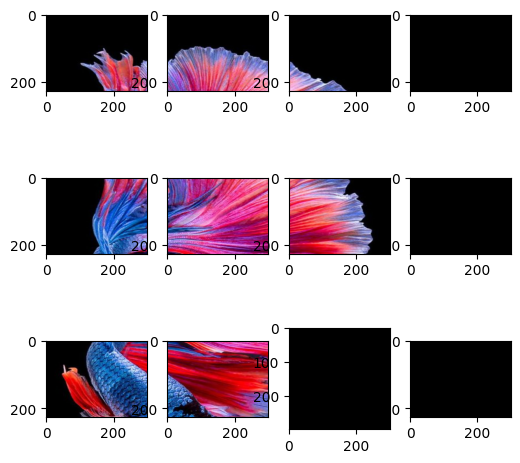

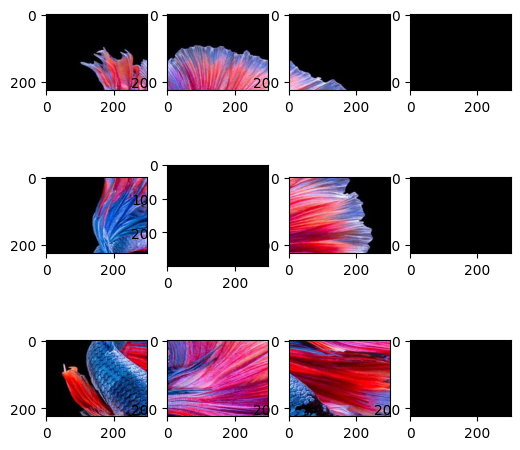

In [109]:
puzzle = Eight_puzzle(img, (2, 2))
print(puzzle.show())
_ = puzzle.show_imgs((6, 6))
print("-------")

# Thử di chuyển ô trống sang trái rồi lên trên.
puzzle.action(["left", "up"])
print(puzzle.show())
_ = puzzle.show_imgs((6, 6))

In [110]:
print(puzzle.shuffle(50))
print(puzzle.get_state())
_ = puzzle.show_imgs((6, 6))

IndexError: list index out of range

In [ ]:
class Node:
    def __init__(self, state, cost, parent_node, action):
        self.state = state
        self.cost = cost
        self.action = action
        self.parent_node = parent_node

    def get_actions(self):
        actions = []
        node = self

        while node:
            if node.action:
                actions.append(node.action)
            node = node.parent_node

        return list(reversed(actions))

In [ ]:
class Problem_solver:
    def __init__(self):
        pass

    def train(self, problem: Type[Problem]):
        pass

    def solve(self):
        pass

In [ ]:
class Random_restart_grad_desc(Problem_solver):
    def __init__(self):
        Problem_solver.__init__(self)

    def train(self, problem: Type[Problem], min_h, h_func, r_func, n_func):
        Problem_solver.train(self, problem)
        self.problem = problem
        self.min_h = min_h
        self.h_func = h_func
        self.r_func = r_func
        self.n_func = n_func

    def solve(self, max_restart, max_iter):
        Problem_solver.solve(self)
        return self.__search(max_restart, max_iter)

    def __search(self, max_restart, max_iter):
        count_restart = 0
        for init_state in self.r_func(self.problem.get_state()):
            if count_restart > max_restart:
                break
            count_restart += 1
            iter_count = 0
            cur_state = (init_state, self.h_func(init_state))
            while iter_count <= max_iter:
                neighbors = list(self.n_func(cur_state[0]))
                iter_count += 1
                hs = {x: self.h_func(x) for x in neighbors}
                found_state = min(hs.items(), key=lambda x: x[1])
                if found_state[1] < cur_state[1]:
                    if found_state[1] == self.min_h:
                        return found_state[0]
                    cur_state = found_state
            else:
                break
        return None

In [ ]:
def get_heuristic(state):
    h = 0

    for i, row in enumerate(state):
        for j, tile_state in enumerate(row):
            if tile_state[0] != i or tile_state[1] != j:
                h += 1
    return h

In [ ]:
def flat_state(state):
    return [y for x in state for y in x]


def pack_state(state):
    return tuple(
        (state[i], state[i + 1], state[i + 2], state[i + 3]) for i in [0, 3, 6, 9]
    )

In [ ]:
import itertools


def iter_states(state):
    flatted_state = flat_state(state)
    for pos_state in itertools.permutations(flatted_state):
        yield pack_state(pos_state)

In [ ]:
def iter_neighbors(state):
    for i, row in enumerate(state):
        for j, tile_state in enumerate(row):
            if tile_state[2]:
                x, y = j, i
                break

    # Left
    if x > 0:
        t = list([list(x) for x in state])
        t[y][x - 1], t[y][x] = t[y][x], t[y][x - 1]
        yield tuple([tuple(x) for x in t])
    # Right
    if x < 2:
        t = list([list(x) for x in state])
        t[y][x + 1], t[y][x] = t[y][x], t[y][x + 1]
        yield tuple([tuple(x) for x in t])
    # Up
    if y > 0:
        t = list([list(x) for x in state])
        t[y - 1][x], t[y][x] = t[y][x], t[y - 1][x]
        yield tuple([tuple(x) for x in t])
    # Down
    if y < 3:
        t = list([list(x) for x in state])
        t[y + 1][x], t[y][x] = t[y][x], t[y + 1][x]
        yield tuple([tuple(x) for x in t])

In [ ]:
solver = Random_restart_grad_desc()
# Learn problem, target h, h func, random state, find neighbors
solver.train(puzzle, 0, get_heuristic, iter_states, iter_neighbors)
goal = solver.solve(479001600, 479001600)

for row in goal:
    print(row)

IndexError: tuple index out of range